In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import pandas as pd

In [2]:
import sklearn

In [21]:
cols = ['class','age','menopause','tumor-size',
        'inv-nodes','node-caps','deg-malig',
        'breast','breast-quad','irradiat']

df = pd.read_csv('./datasets/breast-cancer.data',names = cols)

In [23]:
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [29]:
print('Instance of first class:', np.sum(df['class'] == 'no-recurrence-events'))
print('Instance of second class:', np.sum(df['class'] == 'recurrence-events'))

Instance of first class: 201
Instance of second class: 85


In [30]:
df_oc = df[df['class'] == 'no-recurrence-events']
df_oc = df_oc.drop('class',axis = 1)

In [31]:
df_oc.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [32]:
num_columns = df_oc._get_numeric_data().columns

In [33]:
df_oc.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [69]:
for this_col in num_columns:
    df_oc[this_col] = df_oc[this_col].astype('category')

In [70]:
df_oc.dtypes

age              object
menopause        object
tumor-size       object
inv-nodes        object
node-caps        object
deg-malig      category
breast           object
breast-quad      object
irradiat         object
dtype: object

In [71]:
df_oc.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [72]:
np.unique(df_oc.loc[:,'deg-malig'])

array([1, 2, 3])

In [73]:
np.sum(df_oc['deg-malig'] == 'unknown')

0

### Train Trees

In [79]:
clfs = []
xs = []
ys = []
for col in cols[1:]:
    this_y = df_oc.loc[:,col]
    this_X = df_oc.drop(col,axis = 1)
    this_X = pd.get_dummies(this_X)
    
    xs.append(this_X)
    ys.append(this_y)
    
    this_clf = tree.DecisionTreeClassifier()
    this_clf.fit(this_X,this_y)
    clfs.append(this_clf)

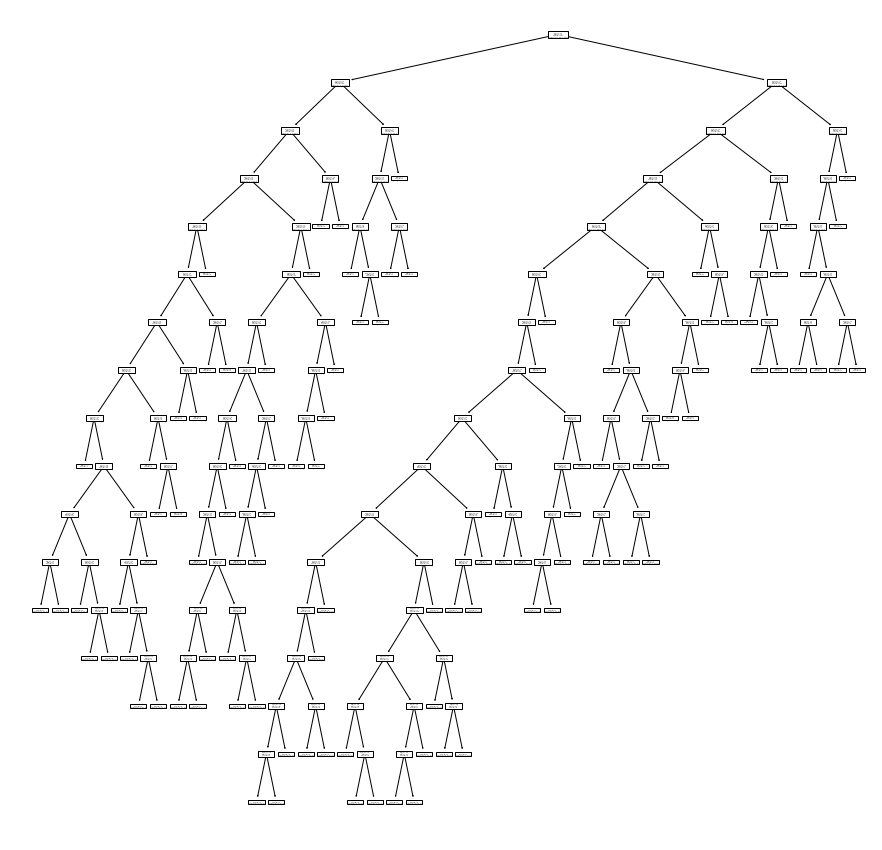

In [87]:
plt.figure(figsize = (15,15))
my_tree = tree.plot_tree(clfs[0])

### Get initial weights

In [88]:
from sklearn.metrics import recall_score, roc_auc_score

Initial weights for layer 1

In [101]:
clfs[1].score(xs[1],ys[1])

0.9800995024875622

In [103]:
recall_pc = []
accs = []

for i,clf in enumerate(clfs):
    recall_pc.append(recall_score(ys[i],clf.predict(xs[i]),average=None))
    accs.append(clf.score(xs[i],ys[i]))
#in__weights_l1 = [f for g in recall_pc for f in g]

In [90]:
recall_pc

[array([1.        , 0.95238095, 0.93650794, 0.92957746, 0.85      ,
        0.8       ]),
 array([0.9893617 , 1.        , 0.97058824]),
 array([0.85714286, 0.85185185, 0.86956522, 0.85294118, 0.66666667,
        0.65714286, 0.66666667, 0.625     , 0.5       , 0.5       ,
        0.2       ]),
 array([1.        , 1.        , 0.66666667, 0.84210526, 1.        ,
        1.        ]),
 array([1.  , 1.  , 0.96]),
 array([0.96610169, 0.93137255, 0.85      ]),
 array([0.99029126, 0.84693878]),
 array([1.        , 0.93333333, 0.81690141, 0.77777778, 0.6       ]),
 array([1.        , 0.91891892])]

In [104]:
accs

[0.9154228855721394,
 0.9800995024875622,
 0.7313432835820896,
 0.9800995024875622,
 0.9950248756218906,
 0.9253731343283582,
 0.9203980099502488,
 0.8507462686567164,
 0.9850746268656716]

### Evaluate on Dataset

Encoder

In [91]:
dt_y_hat = []

for i, clf in enumerate(clfs):
    dt_y_hat.append(clf.predict_proba(xs[i]))

In [92]:
hl1 = []
for i, x_prime in enumerate(dt_y_hat):
    
    hl1.append(np.argmax(x_prime*recall_pc[i],axis = 1))
hl1 = np.array(hl1).T

In [100]:
hl1

array([[1, 2, 5, ..., 0, 1, 0],
       [2, 2, 3, ..., 1, 2, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [3, 0, 2, ..., 0, 0, 1],
       [3, 0, 2, ..., 0, 1, 0],
       [4, 0, 4, ..., 1, 1, 0]])

Decoder